# KMeans Clustering on Random Data

In [1]:
import sklearn
from sklearn import metrics
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import random

import warnings
warnings.filterwarnings("ignore")

In [2]:
data_1 = np.array([[random.randint(1, 400) for i in range(2)] for j in range(50)],
                       dtype=np.float64)

data_2 = np.array([[random.randint(300, 700) for i in range(2)] for j in range(50)],
                       dtype=np.float64)

data_3 = np.array([[random.randint(600, 900) for i in range(2)] for j in range(50)],
                       dtype=np.float64)

data = np.append(np.append(data_1, data_2, axis=0), data_3, axis=0)

In [4]:
data.shape

(150, 2)

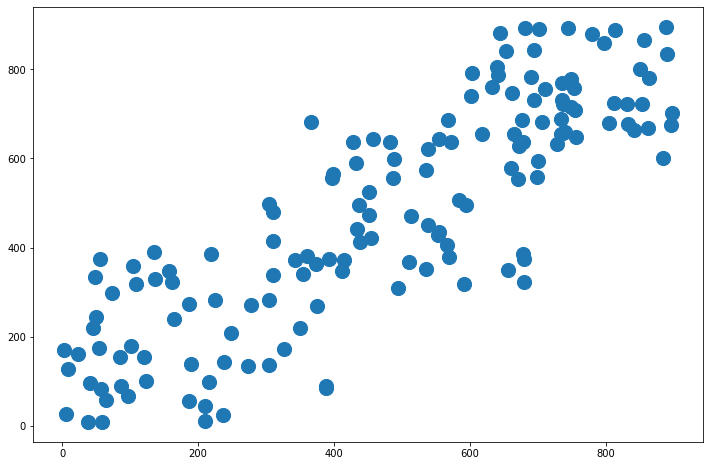

In [5]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(data[:,0], data[:,1], s=200)

In [7]:
labels_1 = np.array([0 for i in range(50)])

labels_2 = np.array([1 for i in range(50)])

labels_3 = np.array([2 for i in range(50)])

labels = np.append(np.append(labels_1, labels_2, axis=0), labels_3, axis=0)

In [8]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
df = pd.DataFrame({'data_x': data[:,0], 'data_y': data[:,1], 'labels': labels})

df.sample(10)

,data_x,data_y,labels
28,389.0,88.0,0
131,728.0,633.0,2
7,50.0,245.0,0
33,57.0,83.0,0
80,305.0,498.0,1
39,326.0,173.0,0
17,164.0,239.0,0
94,566.0,405.0,1
102,736.0,770.0,2
73,454.0,422.0,1


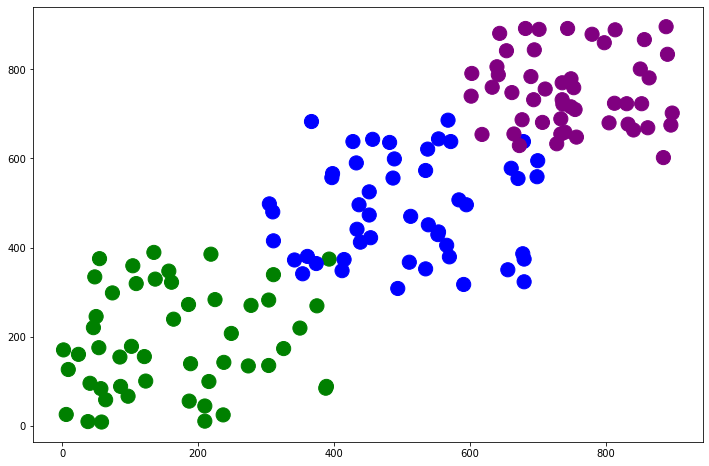

In [10]:
colors = ['green', 'blue', 'purple']

plt.figure(figsize=(12, 8))

plt.scatter(df['data_x'], df['data_y'], c=df['labels'], s=200,
            cmap=matplotlib.colors.ListedColormap(colors))

In [11]:
kmeans_model = KMeans(n_clusters=3, max_iter=10000).fit(data)

In [12]:
kmeans_model.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [13]:
centroids = kmeans_model.cluster_centers_

centroids

array([[472.02222222, 451.84444444],
       [734.67241379, 732.12068966],
       [152.89361702, 180.23404255]])

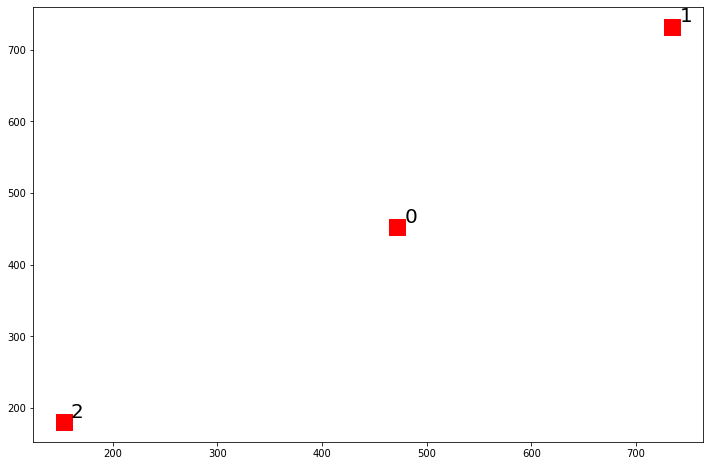

In [16]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(centroids[:,0], centroids[:,1], c='r', s=250, marker='s')

for i in range(len(centroids)):
    plt.annotate( i, (centroids[i][0] + 7, centroids[i][1] + 7), fontsize=20)

In [19]:
print("Homogeneity_score: ", metrics.homogeneity_score(labels, kmeans_model.labels_))

print("Completeness_score: ", metrics.completeness_score(labels, kmeans_model.labels_))

print("v_measure_score: ", metrics.v_measure_score(labels, kmeans_model.labels_))

print('Adjusted_rand_score: ', metrics.adjusted_rand_score(labels, kmeans_model.labels_))

print("Adjusted_mutual_info_score: ", metrics.adjusted_mutual_info_score(labels, kmeans_model.labels_))

print("Silhouette_score: ", metrics.silhouette_score(data, kmeans_model.labels_))

Homogeneity_score:  0.7919140745932784
Completeness_score:  0.796549531684731
v_measure_score:  0.7942250395397753
Adjusted_rand_score:  0.7973597252335258
Adjusted_mutual_info_score:  0.7916414765084373
Silhouette_score:  0.5182863132731736


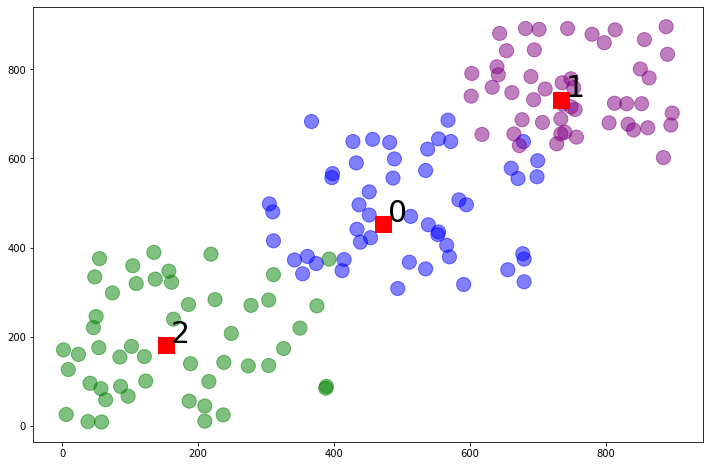

In [22]:
colors = ['green', 'blue', 'purple']

plt.figure(figsize=(12, 8))

plt.scatter(df['data_x'], df['data_y'], c=df['labels'], s=200,
            cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)

plt.scatter(centroids[:,0], centroids[:,1], c='r', s=250, marker='s')

for i in range(len(centroids)):
    plt.annotate( i, (centroids[i][0] + 7, centroids[i][1] + 7), fontsize=30)

In [23]:
data_test = np.array([[442., 621.],
                     [50., 153.],
                     [333., 373.],
                     [835., 816.]])

In [24]:
label_pred = kmeans_model.predict(data_test)

In [25]:
label_pred

array([0, 2, 0, 1])

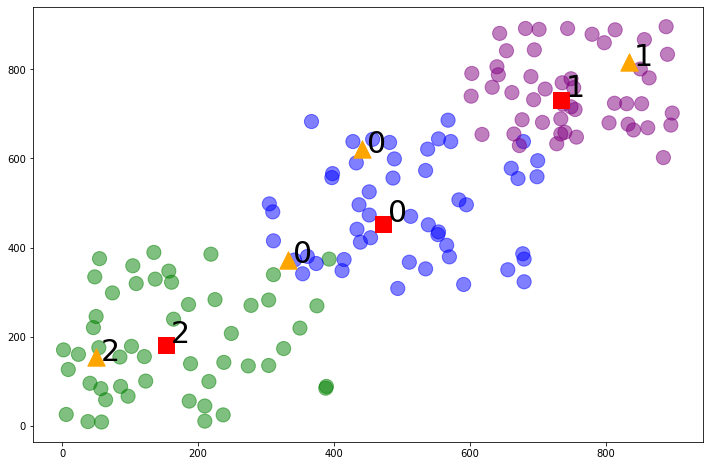

In [28]:
colors = ['green', 'blue', 'purple']

plt.figure(figsize=(12, 8))

plt.scatter(df['data_x'], df['data_y'], c=df['labels'], s=200,
            cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)

plt.scatter(data_test[:,0], data_test[:,1], c='orange', s=300, marker='^')

for i in range(len(label_pred)):
    plt.annotate(label_pred[i], (data_test[i][0] + 7, data_test[i][1] - 7), fontsize=30)
    
plt.scatter(centroids[:,0], centroids[:,1], c='r', s=250, marker='s')

for i in range(len(centroids)):
    plt.annotate( i, (centroids[i][0] + 7, centroids[i][1] + 7), fontsize=30)